In [1]:
#import necessary packages
import time
from selenium import webdriver
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

C:\Users\vikasbhadoria\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#create an instance of browser
driver = webdriver.Chrome()

#creating a dictionary for storing the information after scraping
jobs={"roles":[],
     "companies":[],
     "locations":[],
     "experience":[],
     "skills":[]}

In [ ]:
#iterate over first 30 pages; each page contains 20 results
#for each job we will scrape the role,company, location, experience, skills

for i in range(60):
    driver.get("https://www.naukri.com/data-scientist-jobs-{}".format(i))
    time.sleep(3)
    lst=driver.find_elements_by_css_selector(".jobTuple.bgWhite.br4.mb-8")
    
    for job in lst:
        driver.implicitly_wait(10)
        role=job.find_element_by_css_selector("a.title.fw500.ellipsis").text
        company=job.find_element_by_css_selector("a.subTitle.ellipsis.fleft").text
        location=job.find_element_by_css_selector(".fleft.grey-text.br2.placeHolderLi.location").text
        exp=job.find_element_by_css_selector(".fleft.grey-text.br2.placeHolderLi.experience").text
        skills=job.find_element_by_css_selector(".tags.has-description").text
        jobs["roles"].append(role)
        jobs["companies"].append(company)
        jobs["locations"].append(location)
        jobs["experience"].append(exp)
        jobs["skills"].append(skills)

In [4]:
DS_jobs_df = pd.DataFrame(jobs)

In [6]:
DS_jobs_df.shape

(1282, 5)

In [7]:
DS_jobs_df.to_csv("DataScience_jobs.csv")

In [145]:
df = pd.read_csv("DataScience_jobs.csv", index_col=0)

In [43]:
df[100:150]

,roles,companies,locations,experience,skills
100,AWS Data Scientist- Exponentia.ai- Mumbai,Exponentia.ai,Mumbai,5-10 Yrs,s3\nData Science\npython\nr\npredictive modeli...
101,Data Scientist,Bigshyft Hiring for Cimpress India,Bengaluru,3-7 Yrs,Java\nMachine Learning ML\nStatistical Modelli...
102,Data Scientist,Dvara Trust,Hyderabad,3-5 Yrs,Effective Communication\nAlgorithms\nUse Cases...
103,Data Scientist/python Application Engineer,Impact HR Services Pvt.Ltd.,Bengaluru,2-7 Yrs,Opencv\nImage Processing\nWeb Technologies\nSp...
104,Data Scientist,Danske IT & Support Services India Pvt Ltd,Bengaluru,2-4 Yrs,python\nr\ntableau\nsas\nMS Office\nStatistics...
105,Data Scientist- NLP/Deep Learning- Mumbai (5+ ...,CRESCENDO GLOBAL LEADERSHIP HIRING INDIA PRIVA...,Mumbai,5-8 Yrs,Data Science\nNLP\nDeep Learning\nJava\nAlgori...
106,Data Scientist,Peoplefy Infosolutions Pvt. Ltd.,Mumbai,5-9 Yrs,Data Science\nR\nLogistic Regression\nText Ana...
107,Data Scientist,Bigshyft Hiring for Appyhigh,Gurgaon,2-4 Yrs,Data Mining\nStatistical Modelling\nNOsql\nPython
108,Data Scientist,Bigshyft Hiring for NextGen Invent Corporation,Noida,2-4 Yrs,R\nHive\nData Mining\nMATLAB\nMachine Learning
109,Data Scientist,Bigshyft Hiring for Econolytics,Bengaluru,2-5 Yrs,R\nData Warehousing\nMachine Learning ML\nStat...


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1282 entries, 0 to 1281
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   roles       1282 non-null   object
 1   companies   1282 non-null   object
 2   locations   1282 non-null   object
 3   experience  1282 non-null   object
 4   skills      1279 non-null   object
dtypes: object(5)
memory usage: 60.1+ KB


In [146]:
df = df.dropna()

In [147]:
df = df.apply(lambda x: x.astype(str).str.lower())

In [148]:
df['experience'] = df['experience'].apply(lambda x: x.split(' ')[0])

In [149]:
df.head()

,roles,companies,locations,experience,skills
0,data scientist/ academic counselor,great lakes e-learning services private limited,"chennai, bengaluru",2-7,data science\nartificial intelligence\ntrainin...
1,data scientist,shell india markets private limited,chennai,5-7,data science\nmultivariate analysis\nfactor an...
2,senior data scientist,decision point,gurgaon,3-5,azure\ntimeseries forecasting\nmachine learnin...
3,data scientist - machine learning & statistica...,talent stock solutions,delhi,2-5,data science\nr\nc\ndata scientist\nstatistica...
4,data scientist,zen3tech (a tech mahindra company),hyderabad,3-8,r\na/b testing\ndata manipulation\nmachine lea...


In [150]:
df['locations'] = df['locations'].apply(lambda x: x.split(','))

In [151]:
df['skills'] = df['skills'].apply(lambda x: x.split('\n'))

In [152]:
df.head()

,roles,companies,locations,experience,skills
0,data scientist/ academic counselor,great lakes e-learning services private limited,"[chennai, bengaluru]",2-7,"[data science, artificial intelligence, traini..."
1,data scientist,shell india markets private limited,[chennai],5-7,"[data science, multivariate analysis, factor a..."
2,senior data scientist,decision point,[gurgaon],3-5,"[azure, timeseries forecasting, machine learni..."
3,data scientist - machine learning & statistica...,talent stock solutions,[delhi],2-5,"[data science, r, c, data scientist, statistic..."
4,data scientist,zen3tech (a tech mahindra company),[hyderabad],3-8,"[r, a/b testing, data manipulation, machine le..."


In [153]:
df['roles'] = df['roles'].apply(lambda x: x.replace('sr data scientist','senior data scientist'))

In [154]:
df['roles'] = df['roles'].apply(lambda x: x.replace('sr. data scientist','senior data scientist'))

Text(0.5, 1.0, 'Location Wise Data scientist Jobs')

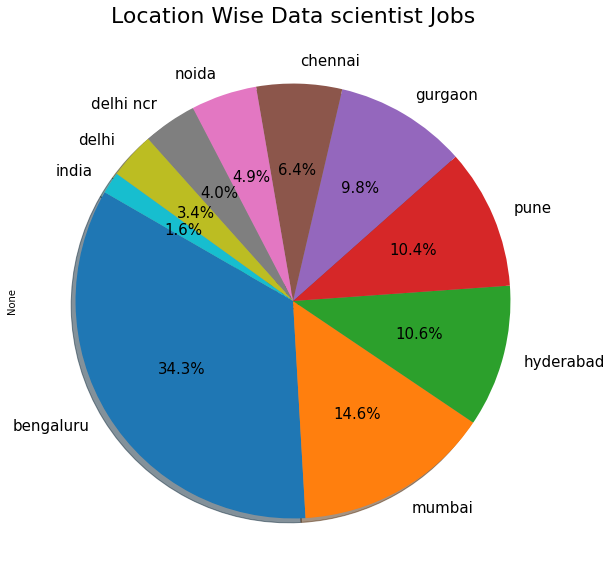

In [74]:
df.locations.apply(pd.Series).stack().str.strip().value_counts()[:10].plot.pie(figsize=(12,10),startangle=150,autopct='%1.1f%%',fontsize=15, shadow=True)
plt.title("Location Wise Data scientist Jobs",fontsize=22)

In [91]:
import plotly.graph_objects as go
import plotly.express as px

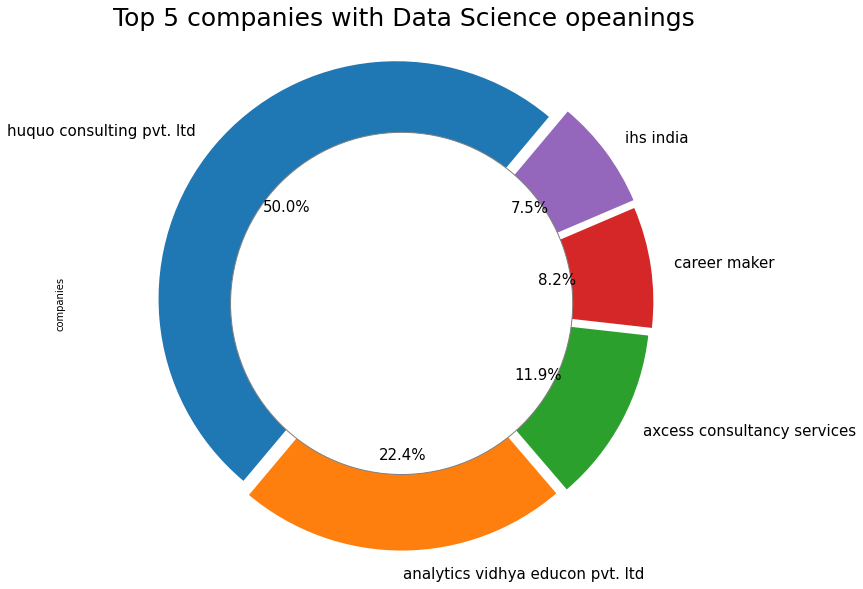

In [103]:
df["companies"].value_counts()[:5].plot.pie(figsize=(12,10),explode=[0.03,0.04,0.05,0.06,0.07], startangle=50,autopct='%1.1f%%',fontsize=15)
plt.title("Top 5 companies with Data Science opeanings",fontsize=25)
centre_circle = plt.Circle((0,0),0.72,color='gray', fc='white',linewidth=1)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

In [155]:
df.head()

,roles,companies,locations,experience,skills
0,data scientist/ academic counselor,great lakes e-learning services private limited,"[chennai, bengaluru]",2-7,"[data science, artificial intelligence, traini..."
1,data scientist,shell india markets private limited,[chennai],5-7,"[data science, multivariate analysis, factor a..."
2,senior data scientist,decision point,[gurgaon],3-5,"[azure, timeseries forecasting, machine learni..."
3,data scientist - machine learning & statistica...,talent stock solutions,[delhi],2-5,"[data science, r, c, data scientist, statistic..."
4,data scientist,zen3tech (a tech mahindra company),[hyderabad],3-8,"[r, a/b testing, data manipulation, machine le..."


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

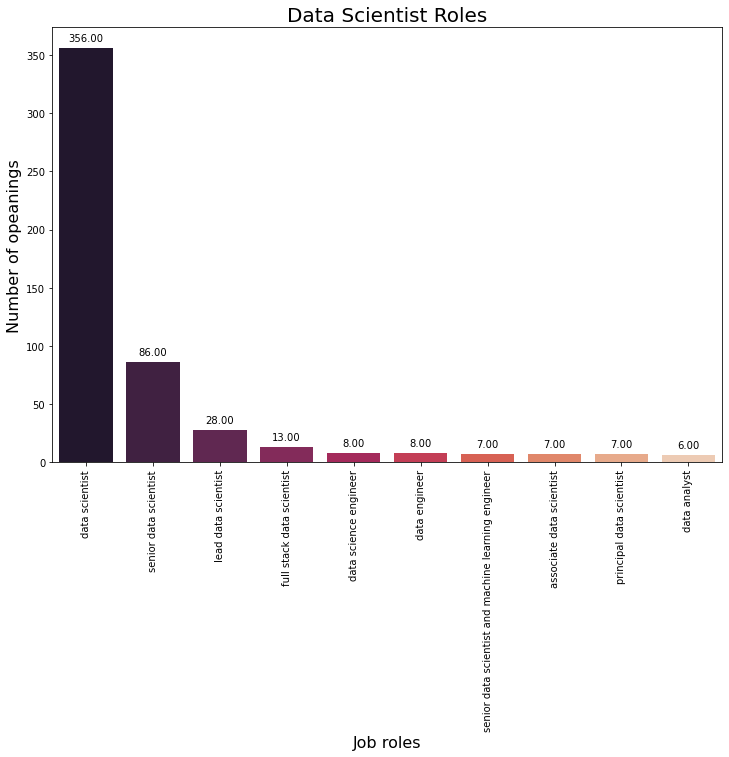

In [109]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="roles", data=df, order = df['roles'].value_counts()[:10].index, palette="rocket")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext= (0, 10), textcoords = 'offset points')
ax.set_title(label='Data Scientist Roles', fontsize=20)
ax.set_xlabel(xlabel='Job roles', fontsize=16)
ax.set_ylabel(ylabel='Number of opeanings', fontsize=16)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

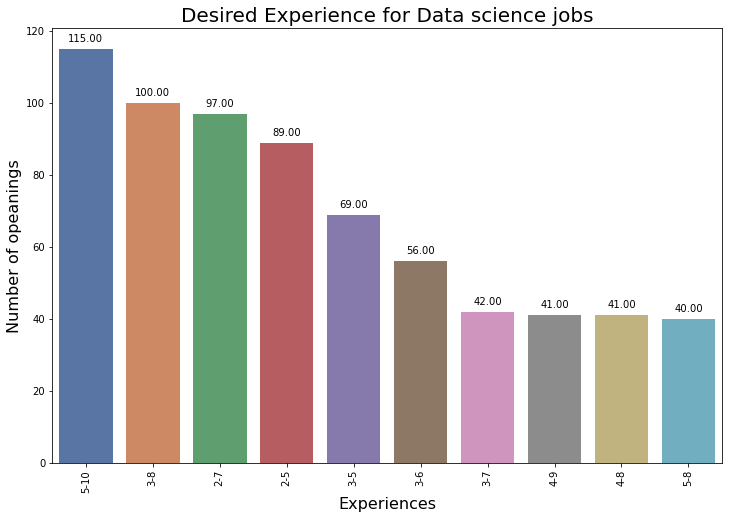

In [110]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="experience", data=df, order = df['experience'].value_counts()[:10].index, palette="deep")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext= (0, 10), textcoords = 'offset points')
ax.set_title(label='Desired Experience for Data science jobs', fontsize=20)
ax.set_xlabel(xlabel='Experiences', fontsize=16)
ax.set_ylabel(ylabel='Number of opeanings', fontsize=16)
plt.xticks(rotation=90)

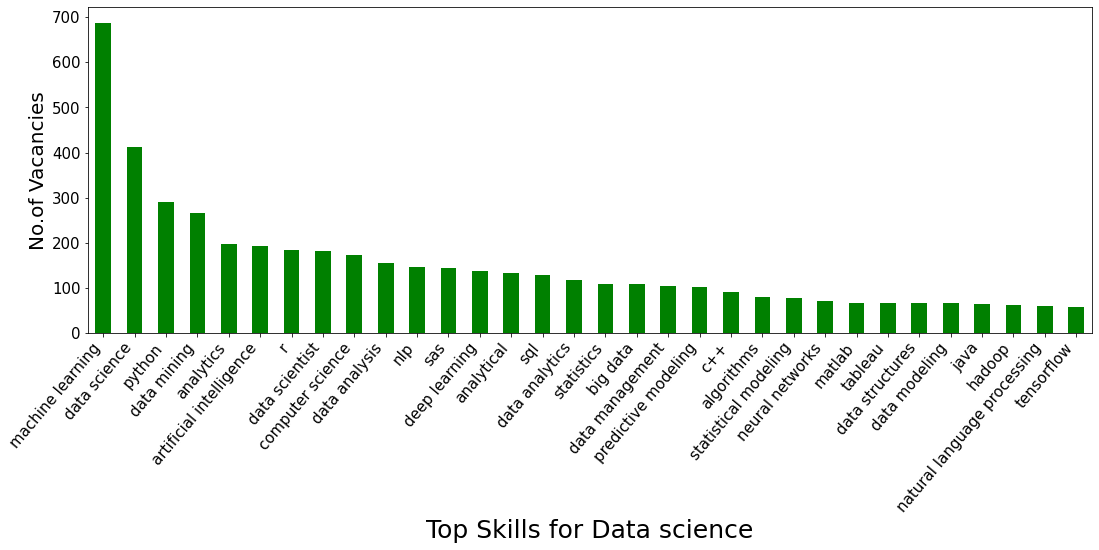

In [112]:
df.skills.apply(pd.Series).stack().value_counts()[:32].plot(kind="bar",figsize=(18,6),fontsize=15,color="g")
plt.xticks(rotation=50,ha='right')
#plt.title("Top Skills for Data science",fontsize=25)
plt.ylabel("No.of Vacancies",fontsize=20)
plt.xlabel("Top Skills for Data science",fontsize=25)
plt.show()

In [156]:
df.head()

,roles,companies,locations,experience,skills
0,data scientist/ academic counselor,great lakes e-learning services private limited,"[chennai, bengaluru]",2-7,"[data science, artificial intelligence, traini..."
1,data scientist,shell india markets private limited,[chennai],5-7,"[data science, multivariate analysis, factor a..."
2,senior data scientist,decision point,[gurgaon],3-5,"[azure, timeseries forecasting, machine learni..."
3,data scientist - machine learning & statistica...,talent stock solutions,[delhi],2-5,"[data science, r, c, data scientist, statistic..."
4,data scientist,zen3tech (a tech mahindra company),[hyderabad],3-8,"[r, a/b testing, data manipulation, machine le..."


In [157]:
#lets convert the skills column into a seperate DataFrame, which makes things easy for preo processing
df_skills=pd.DataFrame(df.skills.apply(pd.Series).stack().value_counts()).reset_index()
df_skills.columns=["skills","count"]
df_skills.head()

,skills,count
0,machine learning,688
1,data science,412
2,python,290
3,data mining,266
4,analytics,197


In [161]:
languages={}
languages["python"]=df_skills["count"][df_skills['skills'].str.contains('python', regex=True)].sum()
languages["r"]=df_skills["count"][df_skills['skills'].str.contains('^r$', regex=True)].sum()
languages["matlab"]=df_skills["count"][df_skills['skills'].str.contains('matlab', regex=True)].sum()
languages["java"]=df_skills["count"][df_skills['skills'].str.contains('java$', regex=True)].sum()
languages["c++"]=df_skills["count"][df_skills['skills'].str.contains('c\+', regex=True)].sum()
languages["sas"]=df_skills["count"][df_skills['skills'].str.contains('sas', regex=True)].sum()
languages["sql"]=df_skills["count"][df_skills['skills'].str.contains('sql', regex=True)].sum()


#to sort the dictionary
languages=dict(sorted(languages.items(), key=itemgetter(1),reverse=True))

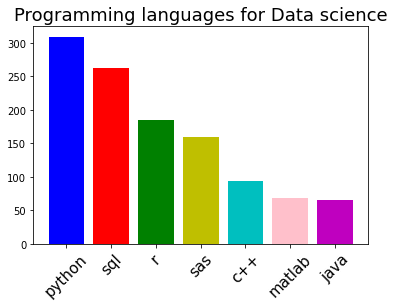

In [163]:
plt.bar(languages.keys(),languages.values(),color=["b","r","g","y","c","pink","m"])
plt.xticks(rotation=45,fontsize=15)
plt.title("Programming languages for Data science",fontsize=18)
plt.show()


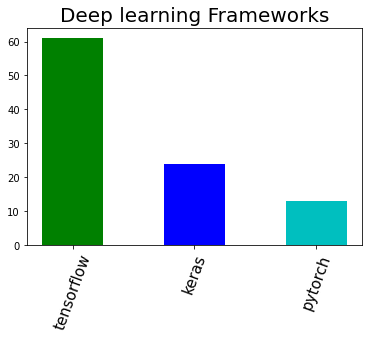

In [164]:
frameworks={}
frameworks['tensorflow']=df_skills["count"][df_skills['skills'].str.contains('tensor', regex=True)].sum()
frameworks['keras']=df_skills["count"][df_skills['skills'].str.contains('keras', regex=True)].sum()
frameworks['pytorch']=df_skills["count"][df_skills['skills'].str.contains('torch', regex=True)].sum()
plt.bar(frameworks.keys(),frameworks.values(),color=["g","b","c"],width=.5)
plt.xticks(rotation=70,fontsize=15)
plt.title("Deep learning Frameworks",fontsize=20)
plt.show()


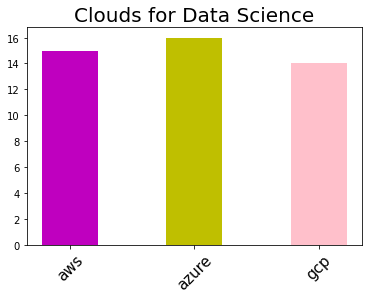

In [165]:
cloud={}
cloud['aws']=df_skills["count"][df_skills['skills'].str.contains('aws', regex=True)].sum()
cloud['azure']=df_skills["count"][df_skills['skills'].str.contains('azure', regex=True)].sum()
cloud['gcp']=df_skills["count"][df_skills['skills'].str.contains('gcp')].sum()
plt.bar(cloud.keys(),cloud.values(),color=["m","y","pink"],width=.45)
plt.xticks(rotation=45,fontsize=15)
plt.title("Clouds for Data Science",fontsize=20)
plt.show()

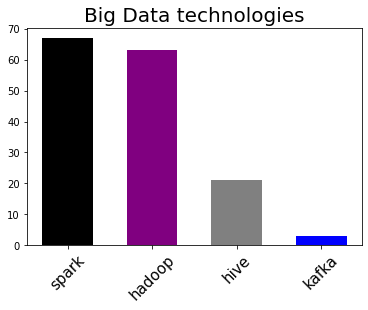

In [166]:
bigdata={}
bigdata["spark"]=df_skills["count"][df_skills['skills'].str.contains('spark', regex=True)].sum()
bigdata["hadoop"]=df_skills["count"][df_skills['skills'].str.contains('hadoop', regex=True)].sum()
bigdata["hive"]=df_skills["count"][df_skills['skills'].str.contains('hive', regex=True)].sum()
bigdata["kafka"]=df_skills["count"][df_skills['skills'].str.contains('kafka', regex=True)].sum()

plt.bar(bigdata.keys(),bigdata.values(),color=["black","purple","grey","blue"],width=0.6)
plt.xticks(rotation=45,fontsize=15)
plt.title("Big Data technologies",fontsize=20)
plt.show()

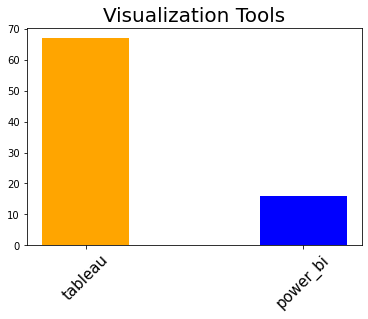

In [167]:
# tools
tools={}
tools["tableau"]=df_skills["count"][df_skills['skills'].str.contains('tableau', regex=True)].sum()
tools["power_bi"]=df_skills["count"][df_skills['skills'].str.contains('power bi', regex=True)].sum()


plt.bar(tools.keys(),tools.values(),color=["orange","blue"],width=(0.4))
plt.xticks(rotation=45,fontsize=15)
plt.title("Visualization Tools",fontsize=20)
plt.show()